In [55]:
import numpy as np
import matplotlib.pyplot as plt
import time
from subprocess import Popen, PIPE
import csv

In [56]:
def Bolsig(sigma_m,E_th,slope):
    f=open("LXCat0.txt","w")
    n=1000
    E=np.logspace(-3,np.log10(3),n)

    f.write('----------------------\n')
    f.write('ELASTIC\nReid\n')
    f.write('1.371541e-4 / mass ratio\n')
    f.write('----------------------\n')
    
    for i in range(n):
        f.write(str(E[i])+' '+str(sigma_m)+'\n')

    f.write('----------------------\n')
    f.write('EXCITATION\nReid\n')
    f.write('0.2 / Thresold Energy\n')
    f.write('1.371541e-4 / mass ratio\n')
    f.write('----------------------\n')
    sigma_exc=slope*(E-E_th)*np.heaviside(E-E_th,1)
    for i in range(n):
        f.write(str(E[i])+' '+str(sigma_exc[i])+'\n')
    
    plt.loglog(E,(sigma_m+sigma_exc)*1e20)
    plt.show()

    f.close()
    
    t=time.time()
    process = Popen(['./bolsigminus', 'ex.dat'], stdout=PIPE, stderr=PIPE)
    stdout, stderr = process.communicate()
    print(time.time()-t)
    #print (stdout)
    
    f=open("Reid.dat","r")
    n=100
    for line in f:
        if line[:8]=='E/N (Td)' and line[8:].strip()=='Mean energy (eV)':
            a=np.zeros(n)
            b=np.zeros(n)
            for i in range(n):
                l=f.readline().strip()
                if len(l)==0: break
                a[i], b[i] = [float(x) for x in l.split()]

    #print(a,b)
    plt.plot(a,b)
    p=np.polyfit(a,b,3)
    b_=np.polyval(p,a)
    plt.plot(a,b_)
    err=np.sqrt(np.sum((b_-b)**2))
    plt.show()
    return p

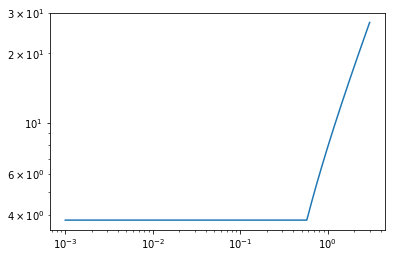

7.4691479206085205


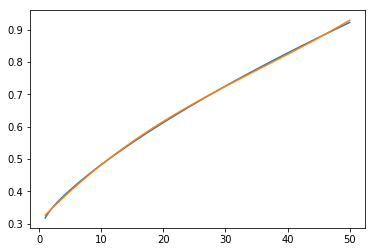

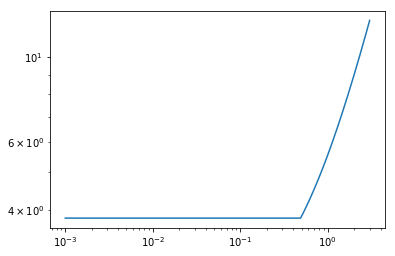

6.710625886917114


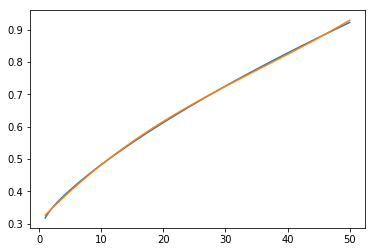

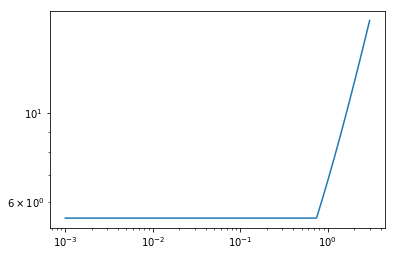

6.368481874465942


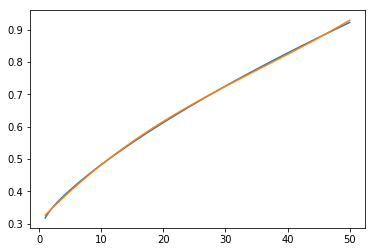

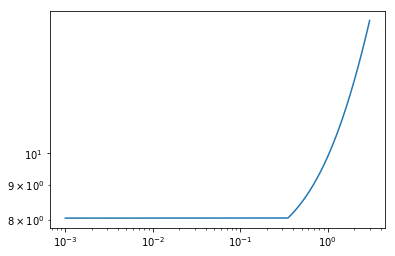

6.464768171310425


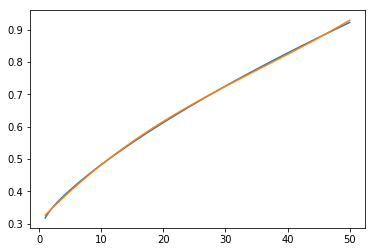

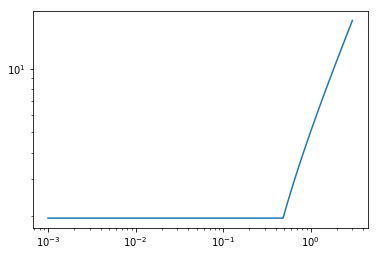

6.736746788024902


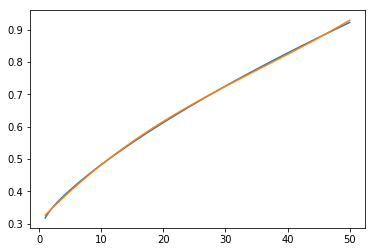

In [62]:
cross=open('Y_train.dat','w')
trans=open('X_train.dat','w')

csvFile.close()
n=5
sigma_m=np.random.rand(n)*9e-20+1e-20
E_th=np.random.rand(n)*0.9+0.1
slope=np.random.rand(n)*9e-20+1e-20
Y=np.zeros((n,3))
Y[:,0]=sigma_m
Y[:,1]=E_th
Y[:,2]=slope
np.savetxt(cross,Y,delimiter=',')
for i in range(n):
    X=Bolsig(sigma_m[i],E_th[i],slope[i])
    np.savetxt(trans,np.reshape(X,(1,-1)),delimiter=',')
cross.close()
trans.close()

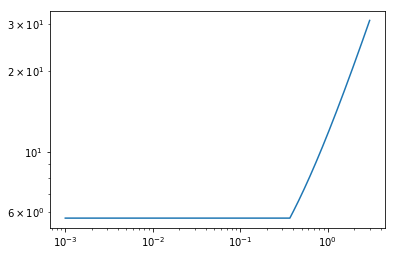

7.699739456176758


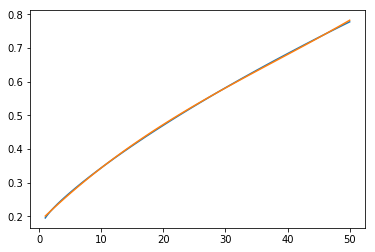

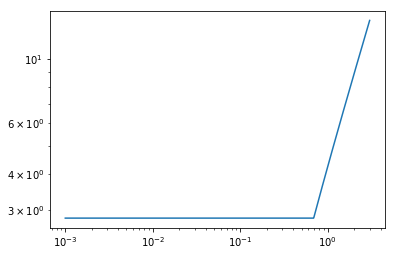

5.889963626861572


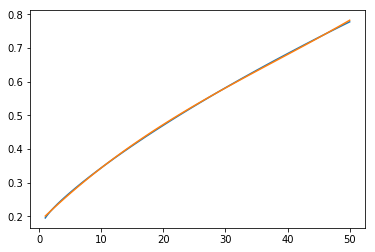

In [61]:
cross=open('Y_test.dat','w')
trans=open('X_test.dat','w')

csvFile.close()
n=2
sigma_m=np.random.rand(n)*9e-20+1e-20
E_th=np.random.rand(n)*0.9+0.1
slope=np.random.rand(n)*9e-20+1e-20
Y=np.zeros((n,3))
Y[:,0]=sigma_m
Y[:,1]=E_th
Y[:,2]=slope
np.savetxt(cross,Y,delimiter=',')
for i in range(n):
    X=Bolsig(sigma_m[i],E_th[i],slope[i])
    np.savetxt(trans,np.reshape(X,(1,-1)),delimiter=',')
cross.close()
trans.close()